In [1]:
# from __future__ import division
import numpy as np 
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

/kaggle/input/heart-disease-uci/heart.csv


1. Loading data and data exploration

In [2]:
data = pd.read_csv('../input/heart-disease-uci/heart.csv')

print('Number of features: %s' %data.shape[1])
print('Number of examples: %s' %data.shape[0])

Number of features: 14
Number of examples: 303


In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

2. Evaluations

In [7]:
# Evaluation 1 - age distribution

min_age = data['age'].min()
max_age = data['age'].max()
mean_age = round(data['age'].mean(),1)

print('Min age: %s' %min_age)
print('Max age: %s' %max_age)
print('Mean age: %s' %mean_age)

Min age: 29
Max age: 77
Mean age: 54.4


In [8]:
# Evaluation 2 - target percentage

# no disease = 0
# disease = 1

no_disease = len(data[data['target'] ==0])
with_disease = len(data[data['target'] ==1])

print('Percentage of people without disease: {:.2f} %' .format(no_disease/len(data['target'])*100))
print('Percentage of people with disease: {:.2f} %' .format(with_disease/len(data['target'])*100))

Percentage of people without disease: 45.54 %
Percentage of people with disease: 54.46 %


In [9]:
# Evaluation 3 - gender counts

# female = 0
# male = 1

female = len(data[data['sex'] ==0])
male = len(data[data['sex'] ==1])

print('Percentage of female: {:.2f} %' .format(female/len(data['sex'])*100))
print('Percentage of male: {:.2f} %' .format(male/len(data['sex'])*100))

Percentage of female: 31.68 %
Percentage of male: 68.32 %


In [10]:
# Evaluation 4 - mean value of target

mean_target = round(data['target'].mean(), 2)

print('Mean value of target: %s' %mean_target)

mean_target_df = pd.DataFrame(data.groupby('target').mean()).reset_index()
mean_target_df

Mean value of target: 0.54


,target,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


3. Visualisations

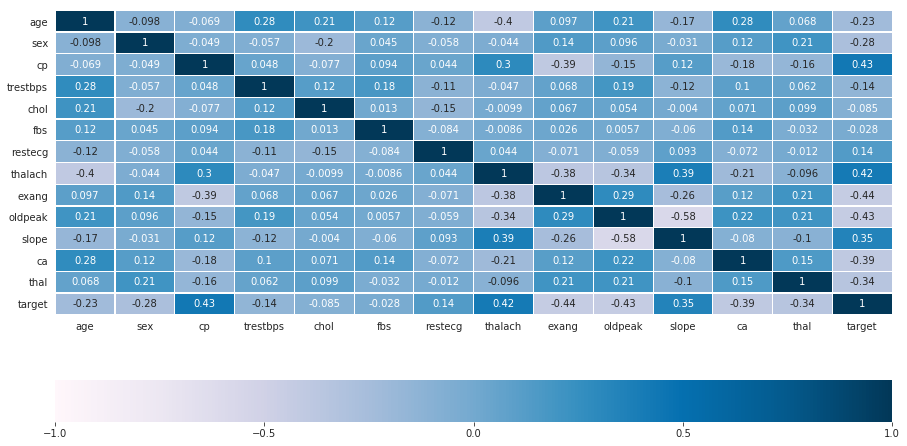

In [11]:
# Visualisation 1 - heatmap of dataset

plt.figure(figsize=(15,8))
cbar_kws = { 'ticks' : [-1, -0.5, 0, 0.5, 1], 'orientation': 'horizontal'}
sns.heatmap(data.corr(), cmap='PuBu', linewidths=0.1, annot=True, vmax=1, vmin=-1, cbar_kws=cbar_kws)

Text(0.5, 1.0, 'Distribution of age')

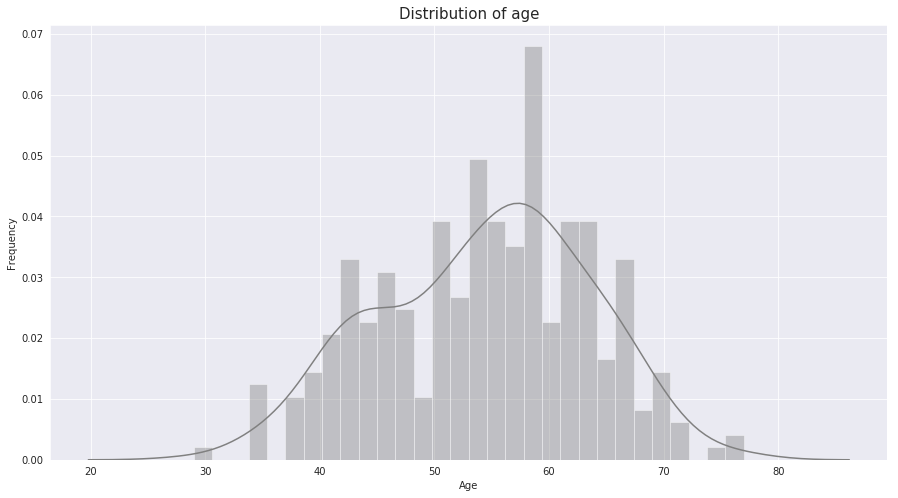

In [12]:
# Visualisation 2 -  distribution of age

plt.figure(figsize=(15,8))
sns.distplot(data['age'], hist=True, bins=30, color='grey')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of age', fontsize=15)

Text(0.5, 1.0, 'Gender')

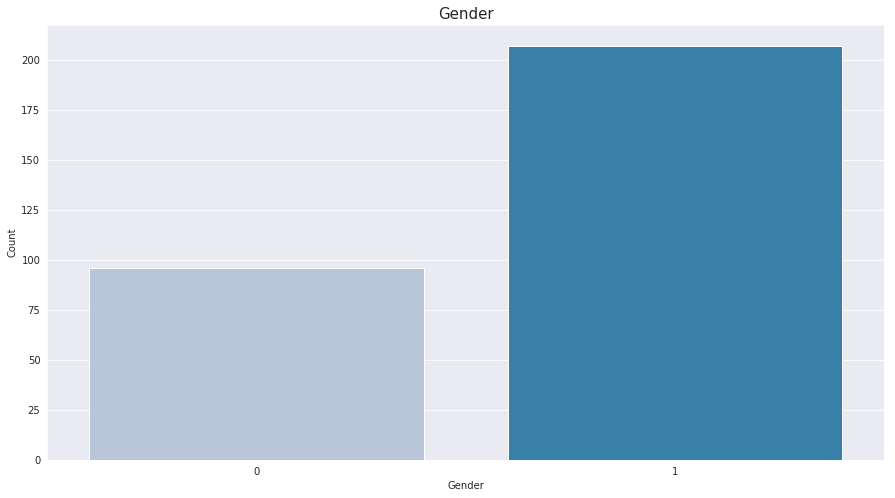

In [13]:
# Visualisation 3 -  gender

plt.figure(figsize=(15,8))
sns.countplot(data['sex'], palette='PuBu')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender', fontsize=15)

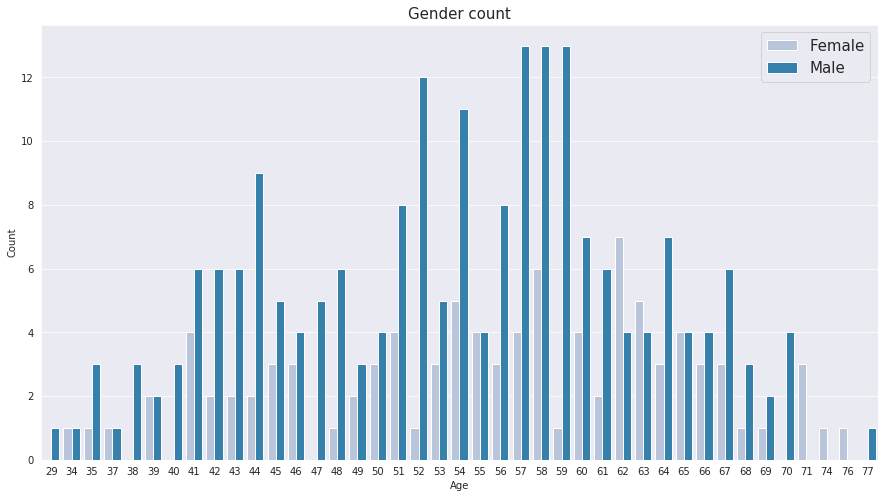

In [14]:
# Visualisation 4 - count of females and males vs age

plt.figure(figsize=(15,8))
sns.countplot(data['age'], hue=data['sex'], palette='PuBu', saturation=0.8)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Gender count', fontsize=15)
plt.legend(loc='upper right', fontsize=15, labels=['Female', 'Male'])

Text(0.5, 1.0, 'Target count')

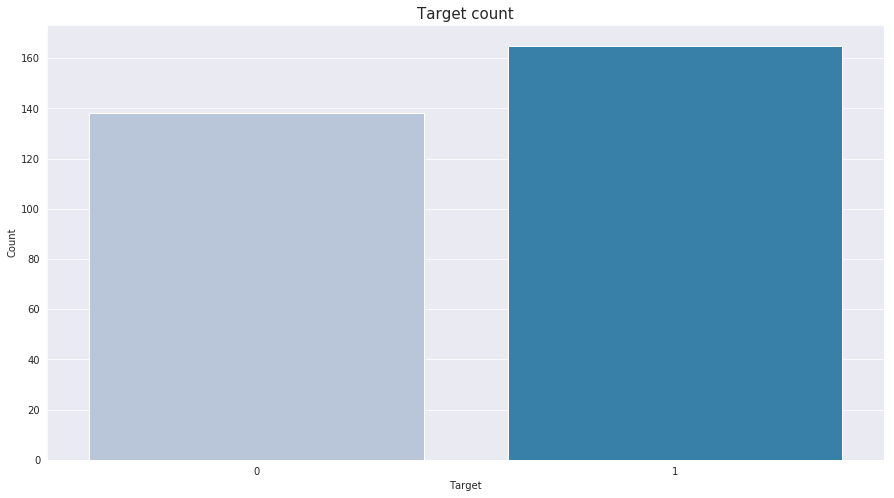

In [15]:
# Visualisation 5 - count of target

plt.figure(figsize=(15,8))
sns.countplot(data['target'], palette='PuBu')
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Target count', fontsize=15)

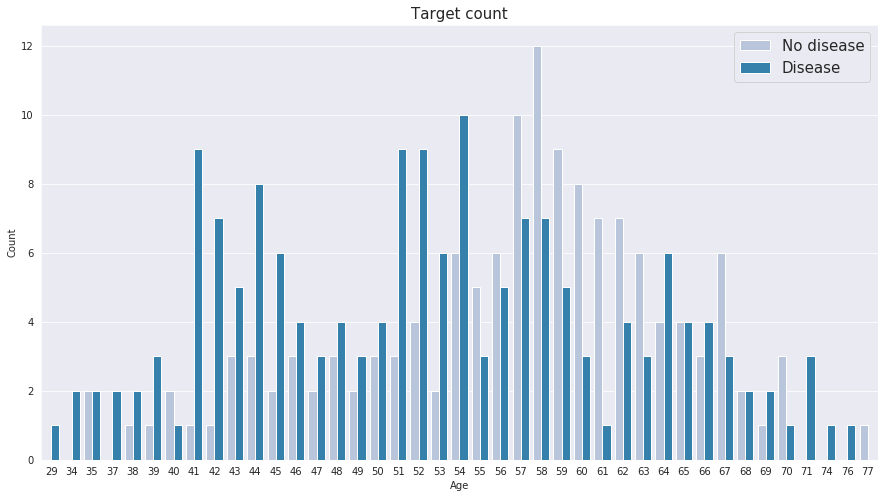

In [16]:
# Visualisation 6 - target in age

plt.figure(figsize=(15,8))
sns.countplot(data['age'], hue=data['target'], palette='PuBu', saturation=0.8)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Target count', fontsize=15)
plt.legend(loc='upper right', fontsize=15, labels=['No disease', 'Disease'])

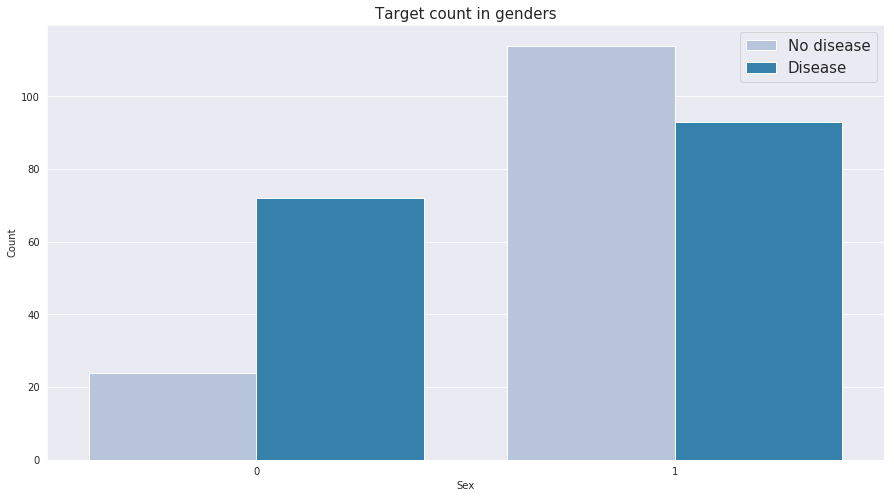

In [17]:
# Visualisation 7 - target in genders

plt.figure(figsize=(15,8))
sns.countplot(data['sex'], hue=data['target'], palette='PuBu', saturation=0.8)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Target count in genders', fontsize=15)
plt.legend(loc='upper right', fontsize=15, labels=['No disease', 'Disease'])

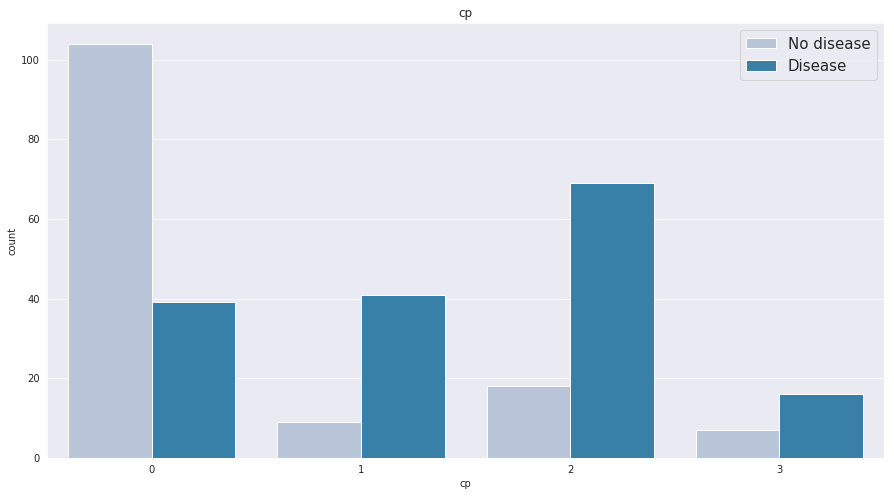

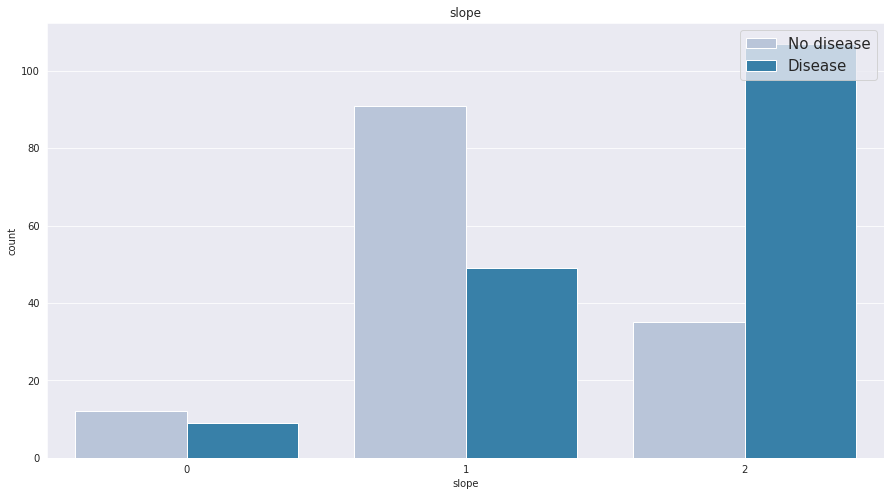

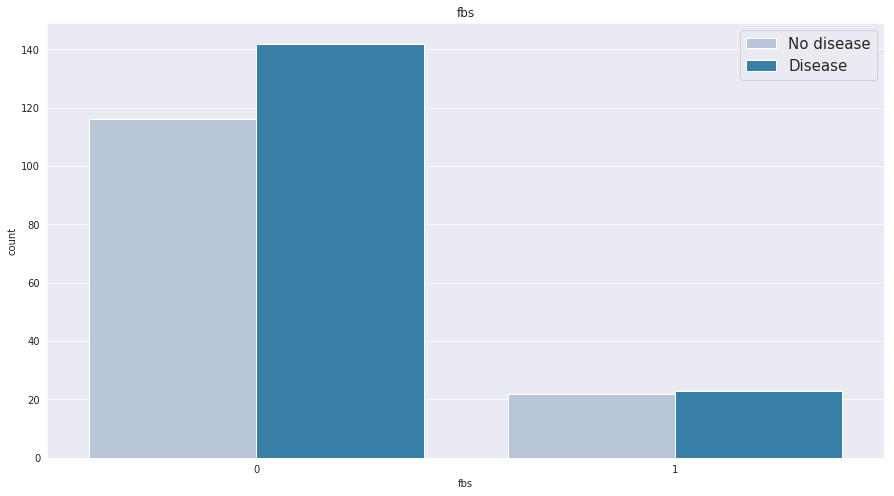

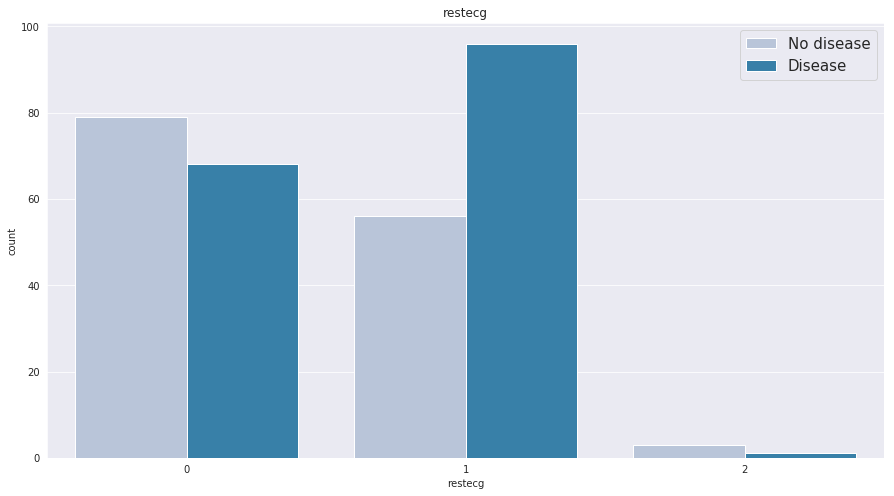

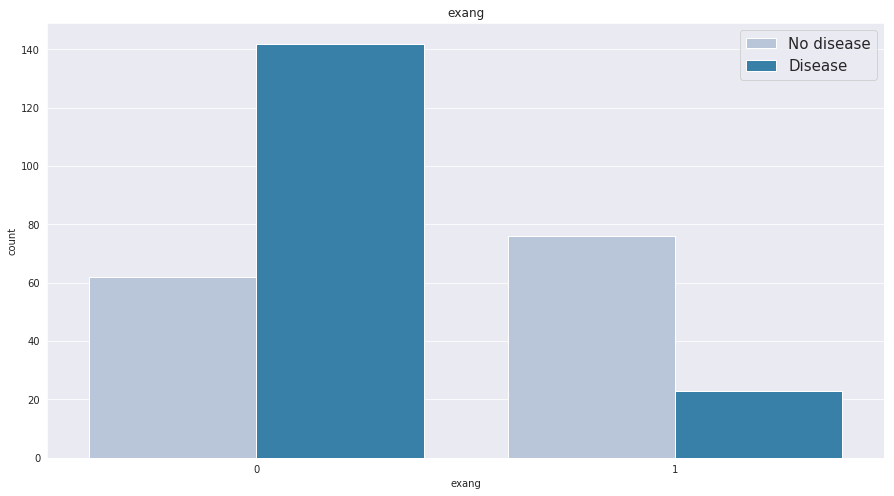

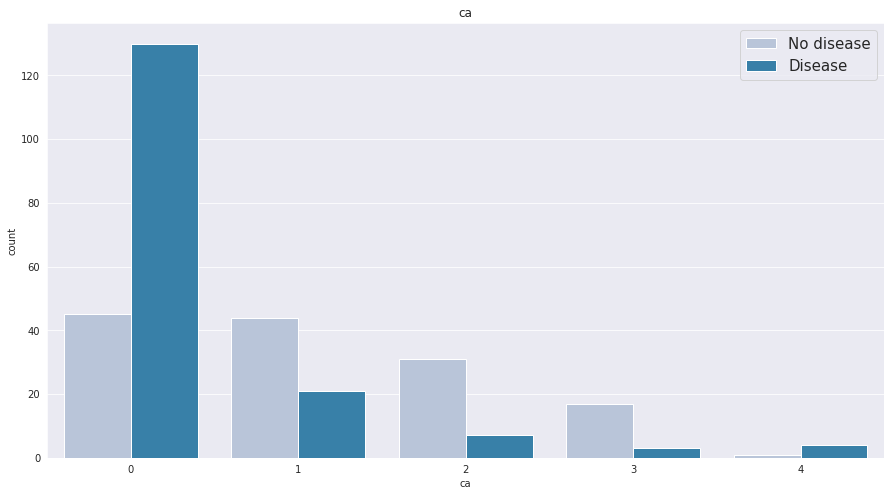

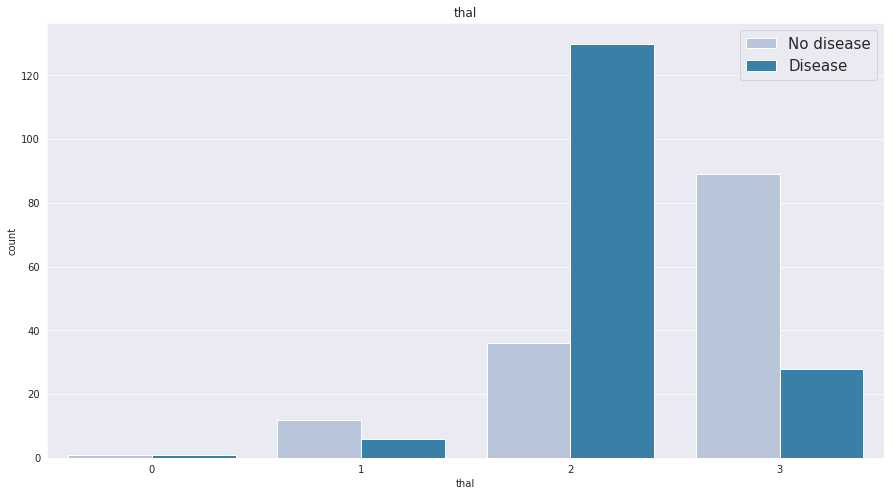

In [18]:
# Visualisation 8 - crosstabs for features and target

names = ['Chest Pain Type', 'Slope', 'FBS - (Fasting Blood Sugar)', 'Resting electrocardiographic results',
        'Exercise induced angina', 'Number of major vessels', 'Thal']

for col in data[['cp', 'slope','fbs', 'restecg', 'exang', 'ca', 'thal']]:
    plt.figure(figsize=(15,8))
    sns.countplot(data[col], hue=data.target, palette='PuBu')
    plt.title(col)
    plt.legend(loc='upper right', fontsize=15, labels=['No disease', 'Disease'])

4. Predictions

In [19]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
# Dummy values for categorical features - cp, slope, thal

dummy_cp = pd.get_dummies(data.cp, prefix='cp')
dummy_slope = pd.get_dummies(data.slope, prefix='slope')
dummy_thal = pd.get_dummies(data.thal, prefix='thal')

In [21]:
# Merging dummies with daataframe and dropping this columns

data = pd.concat([data,dummy_cp, dummy_slope, dummy_thal], axis=1)
data.drop(['cp', 'slope', 'thal'], axis=1, inplace=True)

In [22]:
data.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,1,0,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,1,0,0,0,0,1,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,1,0
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,1,0
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,1,0


In [23]:
# Preparing train and test data for machine learning algorithms

X_data = data.drop('target', axis=1)
y = data.target

In [24]:
# Normalizing data
X = (X_data - np.min(X_data)) / (np.max(X_data) - np.min(X_data)).values

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

4.1. Logistic regression

In [26]:
log = LogisticRegression()
log.fit(X_train, y_train)
log_pred = log.predict(X_test)

In [27]:
log_conf = confusion_matrix(y_test, log_pred)
log_class = classification_report(y_test, log_pred)

In [28]:
log_acc_train = log.score(X_train, y_train)*100
log_acc_test = log.score(X_test, y_test)*100

print("Train Accuracy {:.2f}%".format(log_acc_train))
print("Test Accuracy {:.2f}%".format(log_acc_test))

Train Accuracy 85.54%
Test Accuracy 86.89%


4.2. K Nearest Neighbours

In [29]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [30]:
knn_conf = confusion_matrix(y_test, knn_pred)
knn_class = classification_report(y_test, knn_pred)

In [31]:
knn_acc_train = knn.score(X_train, y_train)*100
knn_acc_test = knn.score(X_test, y_test)*100

print("Train Accuracy {:.2f}%".format(knn_acc_train))
print("Test Accuracy {:.2f}%".format(knn_acc_test))

Train Accuracy 89.26%
Test Accuracy 77.05%


Maximum KNN Score is 88.52%


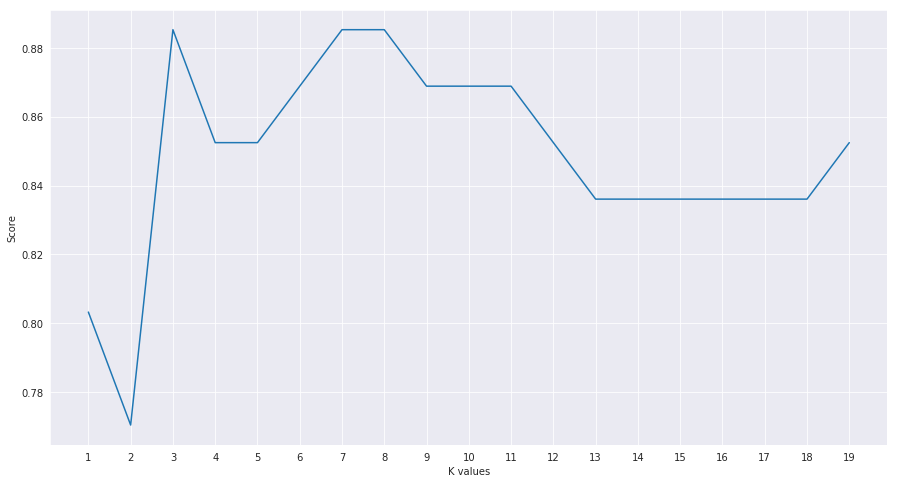

In [32]:
# Best value for KNN

knn_score_list = []
for i in range(1,20):
    knn_2 = KNeighborsClassifier(n_neighbors = i)
    knn_2.fit(X_train, y_train)
    knn_score_list.append(knn_2.score(X_test, y_test))
 

plt.figure(figsize=(15,8))
plt.plot(range(1,20), knn_score_list)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K values")
plt.ylabel("Score")

knn_acc_2_max = max(knn_score_list)*100
print("Maximum KNN Score is {:.2f}%".format(knn_acc_2_max))

4.3. Support Vector Machines

In [33]:
svm = SVC(random_state=1)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

In [34]:
svm_conf = confusion_matrix(y_test, svm_pred)
svm_class = classification_report(y_test, svm_pred)

In [35]:
svm_acc_train = svm.score(X_train, y_train)*100
svm_acc_test = svm.score(X_test, y_test)*100

print("Train Accuracy {:.2f}%".format(svm_acc_train))
print("Test Accuracy {:.2f}%".format(svm_acc_test))

Train Accuracy 84.71%
Test Accuracy 86.89%


4.4. Naive Bayes Gaussian

In [36]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)

In [37]:
nb_conf = confusion_matrix(y_test, nb_pred)
nb_class = classification_report(y_test, nb_pred)

In [38]:
nb_acc_train = nb.score(X_train, y_train)*100
nb_acc_test = nb.score(X_test, y_test)*100

print("Train Accuracy {:.2f}%".format(nb_acc_train))
print("Test Accuracy {:.2f}%".format(nb_acc_test))

Train Accuracy 84.71%
Test Accuracy 86.89%


4.5. Decission tree

In [39]:
d_tree = DecisionTreeClassifier()
d_tree.fit(X_train, y_train)
dtree_pred = d_tree.predict(X_test)

In [40]:
dtree_conf = confusion_matrix(y_test, dtree_pred)
dtree_class = classification_report(y_test, dtree_pred)

In [41]:
dtree_acc_train = d_tree.score(X_train, y_train)*100
dtree_acc_test = d_tree.score(X_test, y_test)*100

print("Train Accuracy {:.2f}%".format(dtree_acc_train))
print("Test Accuracy {:.2f}%".format(dtree_acc_test))

Train Accuracy 100.00%
Test Accuracy 78.69%


4.6. Random forest classifier

In [42]:
rtree = RandomForestClassifier()
rtree.fit(X_train, y_train)
rtree_pred = rtree.predict(X_test)

In [43]:
rtree_conf = confusion_matrix(y_test, rtree_pred)
rtree_class = classification_report(y_test, rtree_pred)

In [44]:
rtree_acc_train = rtree.score(X_train, y_train)*100
rtree_acc_test = rtree.score(X_test, y_test)*100

print("Train Accuracy {:.2f}%".format(rtree_acc_train))
print("Test Accuracy {:.2f}%".format(rtree_acc_test))

Train Accuracy 99.59%
Test Accuracy 78.69%


4.7. Confusion matrix

In [45]:
# confusion martix all

conf_all = [log_conf, knn_conf, svm_conf, nb_conf, dtree_conf, rtree_conf]
class_all = [log_class, knn_class, svm_class, nb_class, dtree_class, rtree_class]
class_names = ['Logistic regression', 'K Nearest Neighbours', 'Support Vector Machine', 'Naive Bayes'
              , 'Decision tree', 'Random forest']

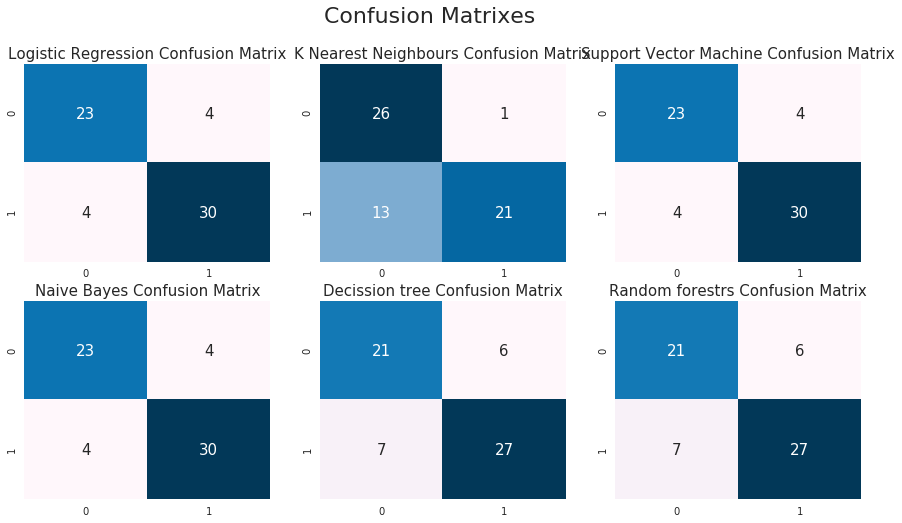

In [46]:
plt.figure(figsize=(15,8))
plt.suptitle("Confusion Matrixes",fontsize=22)

plt.subplot(2,3,1)
plt.title('Logistic Regression Confusion Matrix', fontsize=15)
sns.heatmap(conf_all[0], annot=True, cbar=False, annot_kws={'size':15}, cmap='PuBu')

plt.subplot(2,3,2)
plt.title('K Nearest Neighbours Confusion Matrix', fontsize=15)
sns.heatmap(conf_all[1], annot=True, cbar=False, annot_kws={'size':15}, cmap='PuBu')

plt.subplot(2,3,3)
plt.title('Support Vector Machine Confusion Matrix', fontsize=15)
sns.heatmap(conf_all[2], annot=True, cbar=False, annot_kws={'size':15}, cmap='PuBu')

plt.subplot(2,3,4)
plt.title('Naive Bayes Confusion Matrix', fontsize=15)
sns.heatmap(conf_all[3], annot=True, cbar=False, annot_kws={'size':15}, cmap='PuBu')

plt.subplot(2,3,5)
plt.title('Decission tree Confusion Matrix', fontsize=15)
sns.heatmap(conf_all[4], annot=True, cbar=False, annot_kws={'size':15}, cmap='PuBu')

plt.subplot(2,3,6)
plt.title('Random forestrs Confusion Matrix', fontsize=15)
sns.heatmap(conf_all[5], annot=True, cbar=False, annot_kws={'size':15}, cmap='PuBu')

4.8. Classification reports

In [47]:
for name, cls in zip(class_names, class_all):
    print('Classification report for %s' %name)
    print(cls)
    print('\n')

Classification report for Logistic regression
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        27
           1       0.88      0.88      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



Classification report for K Nearest Neighbours
              precision    recall  f1-score   support

           0       0.67      0.96      0.79        27
           1       0.95      0.62      0.75        34

    accuracy                           0.77        61
   macro avg       0.81      0.79      0.77        61
weighted avg       0.83      0.77      0.77        61



Classification report for Support Vector Machine
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        27
           1       0.88      0.88      0.88        34

    accuracy                        